# San Silvestre 2021

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from utils import load_data, plot_hist

In [3]:
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
%precision %.2f


'%.2f'

In [4]:

data = load_data()
data.head()

,Dorsal,Nombre,Categ.,Puesto,P.Cat.,Tiempo,Ritmo Km.,"Km. 2,5",Km. 5,"Km. 7,5",TiempoMinutos,"Km. 2,5 Minutos",Km. 5 Minutos,"Km. 7,5 Minutos",Ritmo Km. Minutos
0,36417,David Bascuñana Corrales,M-35,1,1,0:29:13,"2'55""/km",0:07:09,0:14:17,0:21:03,29.22,7.15,14.28,21.05,2.92
1,27702,Jaouad El Bissis El Bissis,M-35,2,2,0:29:18,"2'55""/km",0:07:09,0:14:17,0:21:09,29.30,7.15,14.28,21.15,2.92
2,29141,Luis Agustín Escriche,Sénior M,3,1,0:30:30,"3'03""/km",0:07:23,0:14:37,0:21:46,30.50,7.38,14.62,21.77,3.05
3,22312,Javier Martinez Fernández,M-35,4,3,0:30:48,"3'04""/km",0:07:24,0:14:54,0:22:07,30.80,7.40,14.90,22.12,3.07
4,10217,Sergio Salinero Miguel,M-35,5,4,0:30:59,"3'05""/km",0:07:25,0:14:54,0:22:10,30.98,7.42,14.90,22.17,3.08


In [5]:
mine = data.query("Nombre=='Maximiliano Greco'")
mine

,Dorsal,Nombre,Categ.,Puesto,P.Cat.,Tiempo,Ritmo Km.,"Km. 2,5",Km. 5,"Km. 7,5",TiempoMinutos,"Km. 2,5 Minutos",Km. 5 Minutos,"Km. 7,5 Minutos",Ritmo Km. Minutos
0,31471,Maximiliano Greco,Sénior M,5746,1449,0:52:56,"5'17""/km",0:12:34,0:24:45,0:37:06,52.93,12.57,24.75,37.10,5.28


# Estadísticas

In [ ]:
tiempo_all = data["Tiempo Minutos"]
tiempo_mine = mine["Tiempo Minutos"]

Cuánto tiempo tardé en completar la carrera? 

In [6]:
tiempo_mine.item()

52.93

De media, cuánto tardaron los corredores en completar la carrera ? 

In [7]:
float(tiempo_all.mean())

58.15

En qué percetil está mi tiempo ?

In [8]:
stats.percentileofscore(tiempo_all, tiempo_mine.item())

35.03

Cuánto tardó el corredor mediano ?

In [9]:
tiempo_all.median()

56.85

Cuánto tardó el corredor que tardó menos que el 80% ? 

In [10]:
tiempo_all.quantile(0.2)

48.75

## Pace 

In [22]:
ritmos = ["Km. 2,5 Minutos", "Km. 5 Minutos", "Km. 7,5 Minutos", "Ritmo Km. Minutos"]

In [23]:
data[ritmos].describe()

,"Km. 2,5 Minutos",Km. 5 Minutos,"Km. 7,5 Minutos",Ritmo Km. Minutos
count,"16,221.00","16,290.00","16,282.00","16,391.00"
mean,14.13,28.05,41.72,5.81
std,4.18,6.35,8.74,1.17
min,7.15,14.28,21.05,2.92
25%,12.17,24.23,36.09,5.02
50%,13.88,27.50,40.87,5.68
75%,15.72,31.07,46.18,6.45
max,213.65,223.07,232.10,19.32


In [24]:
mine[ritmos]

,"Km. 2,5 Minutos",Km. 5 Minutos,"Km. 7,5 Minutos",Ritmo Km. Minutos
0,12.57,24.75,37.10,5.28


# Plot

In [ ]:
plot_hist("Tiempo Minutos", data, mine)

In [ ]:
plot_hist("Ritmo Km. Minutos", data, mine)

In [ ]:
plot_hist("Km. 2,5 Minutos", data, mine)

In [ ]:
plot_hist("Km. 5 Minutos", data, mine)

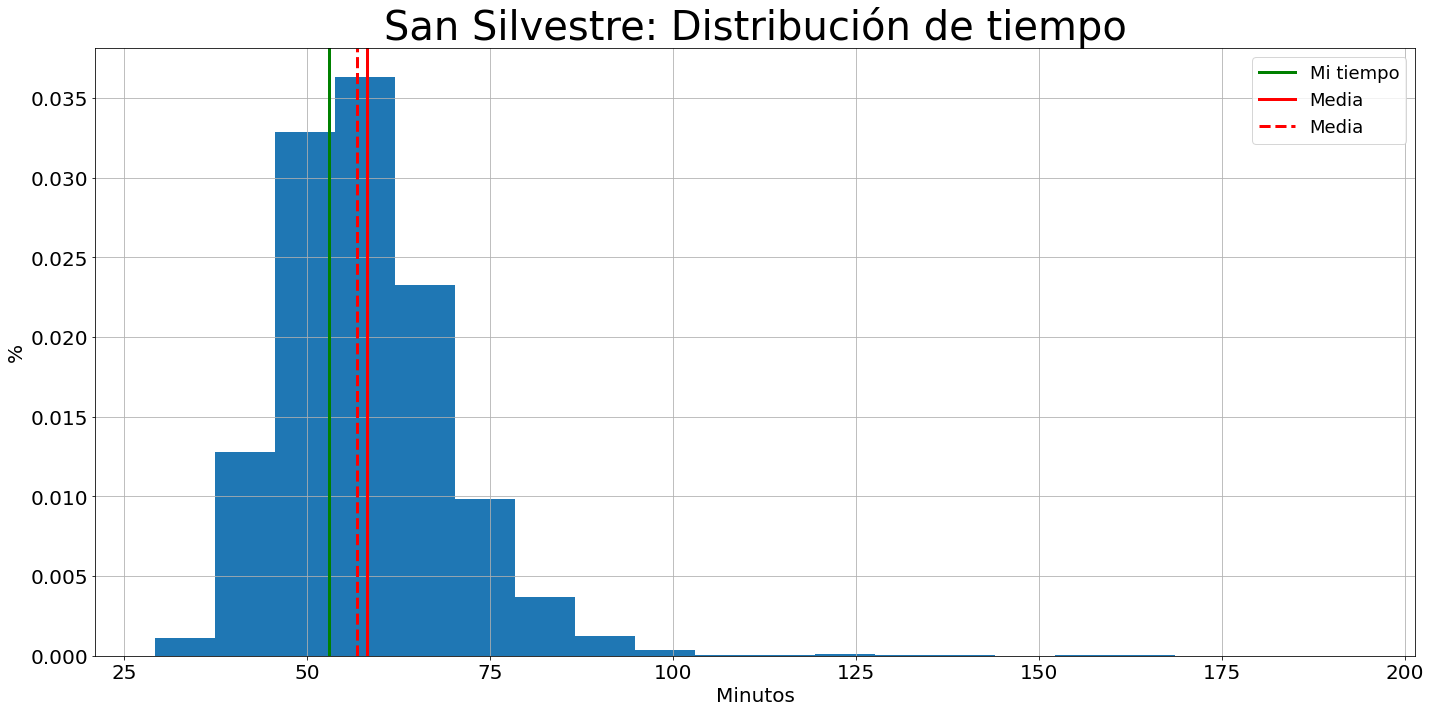

In [14]:
plot_hist("Km. 7,5 Minutos", data, mine)

Cual fue la evolución de los corredores por cada etapa? 

In [ ]:
delta1 = data["Km. 5 Minutos"] - data["Km. 2,5 Minutos"]
delta2 = data["Km. 7,5 Minutos"] - data["Km. 5 Minutos"]
delta1.hist()
delta2.hist()
plt.show()